In [258]:
import numpy as nb
import pandas as pd
import os
import sys
from sklearn.linear_model import LogisticRegression
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
#from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [259]:
base_dir = os.path.dirname(os.path.abspath(sys.argv[1]))
file_path = os.path.join(base_dir, "..\Data\sobar-72.csv")  
raw_path = Path(file_path)
corrected_path = raw_path.resolve()
print("Base directory:", base_dir)
print("File path:", file_path)
print("corrected path:", corrected_path)
df = pd.read_csv(corrected_path)

Base directory: C:\Users\serig\OneDrive - Université Côte d'Azur\2 éme année\projet Cancer\Risques-de-cancer-cervical\Code
File path: C:\Users\serig\OneDrive - Université Côte d'Azur\2 éme année\projet Cancer\Risques-de-cancer-cervical\Code\..\Data\sobar-72.csv
corrected path: C:\Users\serig\OneDrive - Université Côte d'Azur\2 éme année\projet Cancer\Risques-de-cancer-cervical\Data\sobar-72.csv


In [260]:
df.head

<bound method NDFrame.head of     behavior_sexualRisk  behavior_eating  behavior_personalHygine  \
0                    10               13                       12   
1                    10               11                       11   
2                    10               15                        3   
3                    10               11                       10   
4                     8               11                        7   
..                  ...              ...                      ...   
67                   10               14                       14   
68                   10               12                       15   
69                   10                8                       11   
70                    9               12                       13   
71                   10               14                       14   

    intention_aggregation  intention_commitment  attitude_consistency  \
0                       4                     7                     

### Données et variable cible

In [261]:
X = df.drop(["ca_cervix"], axis=1)
y=df["ca_cervix"]
X.shape
#y.shape

(72, 19)

### Séparation des données entrainement et test

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 1) Modéle arbre de décision

### Création et entraînement du modèle

In [263]:
modele_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
modele_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

### Prédiction et évaluation 

In [264]:
y_pred_tree = modele_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Précision du modèle : {accuracy_tree:.2f}")
print(classification_report(y_test, y_pred_tree))

Précision du modèle : 0.80
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.50      1.00      0.67         3

    accuracy                           0.80        15
   macro avg       0.75      0.88      0.76        15
weighted avg       0.90      0.80      0.82        15



### Visualisation de l'arbre de décision

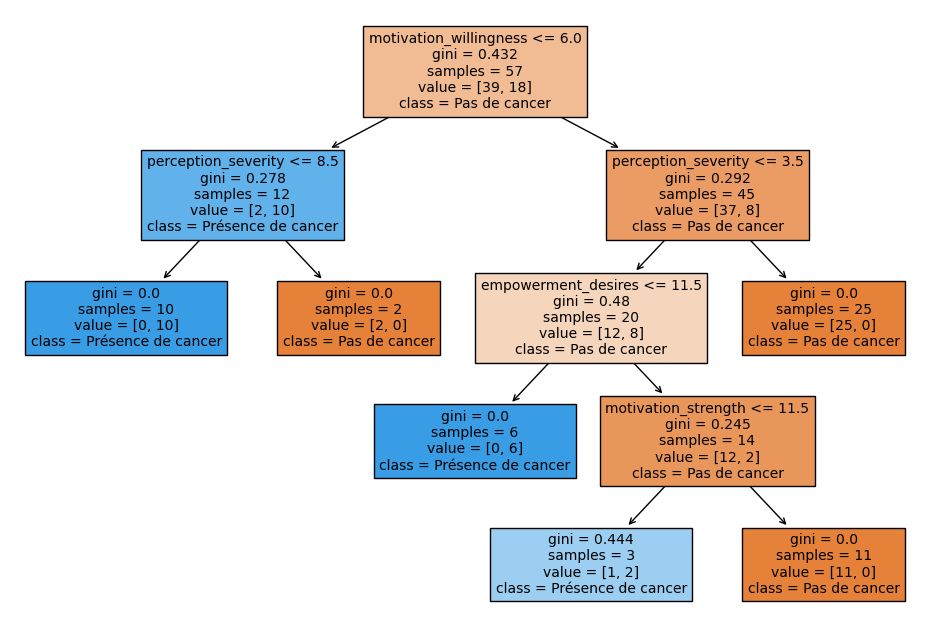

In [265]:
plt.figure(figsize=(12, 8))
plot_tree(modele_tree, feature_names=X.columns, class_names=["Pas de cancer", "Présence de cancer"], filled=True)
plt.show()

In [266]:
#Les nœuds représentent les décisions prises par l’arbre à chaque étape.
#Les valeurs affichées indiquent la condition de séparation (feature ≤ valeur).
#Les couleurs montrent la classe dominante dans chaque nœud.

#une feuille est bleu foncé, cela signifie que la majorité des données dans cette région appartiennent à la "0" donc "Par de cancer".

#Les proportions de chaque classe sont affichées dans les feuilles terminales.

# 2) Modéle Regression logistique

### Création et entraitement du modéle

In [267]:
#Contrairement à la régression linéaire qui prédit des valeurs continues, la régression logistique prédit des probabilités et
# applique une transformation sigmoïde pour obtenir une sortie entre 0 et 1
# Si la probabilité est > 0.5, on classe l’observation en 1 (Présence de cancer) Sinon, elle est classée en 0 (Pas de cancer)
modele_logistique = LogisticRegression(solver="saga",max_iter=1000)  # Augmenter les itérations
modele_logistique.fit(X_train, y_train)

C:\Users\serig\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

### Prédiction

In [268]:
y_pred_logistique = modele_logistique.predict(X_test)

### Evaluation

In [269]:
# Score d'accuracy
print("Accuracy :", accuracy_score(y_test, y_pred_logistique))

# Matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_logistique))

# Rapport détaillé des performances (Précision, Rappel, F1-score)
print("Rapport de classification :\n", classification_report(y_test, y_pred_logistique))

Accuracy : 1.0
Matrice de confusion :
 [[12  0]
 [ 0  3]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



### Interpretation des coefficients du modéle

In [270]:
coef = pd.DataFrame({"Feature": X.columns, "Coefficient": modele_logistique.coef_[0]})
print(coef.sort_values(by="Coefficient", ascending=False))
# Un coefficient positif indique que la variable augmente la probabilité d'appartenir à la classe 1 "présence du cancer".
# Un coefficient négatif indique que la variable diminue cette probabilité

                       Feature  Coefficient
1              behavior_eating     0.740302
5         attitude_consistency     0.669085
15  socialSupport_instrumental     0.536499
6         attitude_spontaneity     0.354916
12      motivation_willingness     0.212621
0          behavior_sexualRisk     0.175319
9     perception_vulnerability     0.043149
13  socialSupport_emotionality     0.003423
7       norm_significantPerson    -0.073882
4         intention_commitment    -0.123356
2      behavior_personalHygine    -0.171989
11         motivation_strength    -0.182338
17       empowerment_abilities    -0.196247
8             norm_fulfillment    -0.251213
3        intention_aggregation    -0.263838
14  socialSupport_appreciation    -0.474647
16       empowerment_knowledge    -0.506221
18         empowerment_desires    -0.534687
10         perception_severity    -0.908229


# 3) Modèle SVM (Support Vector Machine)

### Intanciation et entrainement du modéle

In [271]:
modele_svm = SVC(kernel="linear", C=1.0,probability=True)  # "linear", "rbf", "poly", "sigmoid"
modele_svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

### Prédiction

In [272]:
y_pred_svm = modele_svm.predict(X_test)

### Evaluation

In [273]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred_svm))
print("Rapport de classification:\n", classification_report(y_test, y_pred_svm))

Accuracy: 1.0
Matrice de confusion:
 [[12  0]
 [ 0  3]]
Rapport de classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



### Visualisation de la frontiére de decission

In [274]:
#import matplotlib.pyplot as plt
#from mlxtend.plotting import plot_decision_regions
#plt.figure(figsize=(8, 6))
#plot_decision_regions(X_train.to_numpy(), y_train.to_numpy(), clf=modele_svm, legend=2)
#plt.title("Frontière de décision SVM")
#plt.show()

# 4) Modéle K NN

### Instanciation et entrainement

In [275]:
modele_knn = KNeighborsClassifier(n_neighbors=3)
modele_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Prédiction

In [276]:
y_pred_knn = modele_knn.predict(X_test)

### Evaluation

In [277]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.33%


### Optimisation du paramétre K

In [278]:
from sklearn.model_selection import cross_val_score

# Tester plusieurs valeurs de k
k_range = range(1, 11)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Afficher la meilleure valeur de k
best_k = k_range[np.argmax(k_scores)]
print(f"Le meilleur k est {best_k} avec une précision de {max(k_scores) * 100:.2f}%")

Le meilleur k est 9 avec une précision de 87.62%


# Choix du meilleur modéle

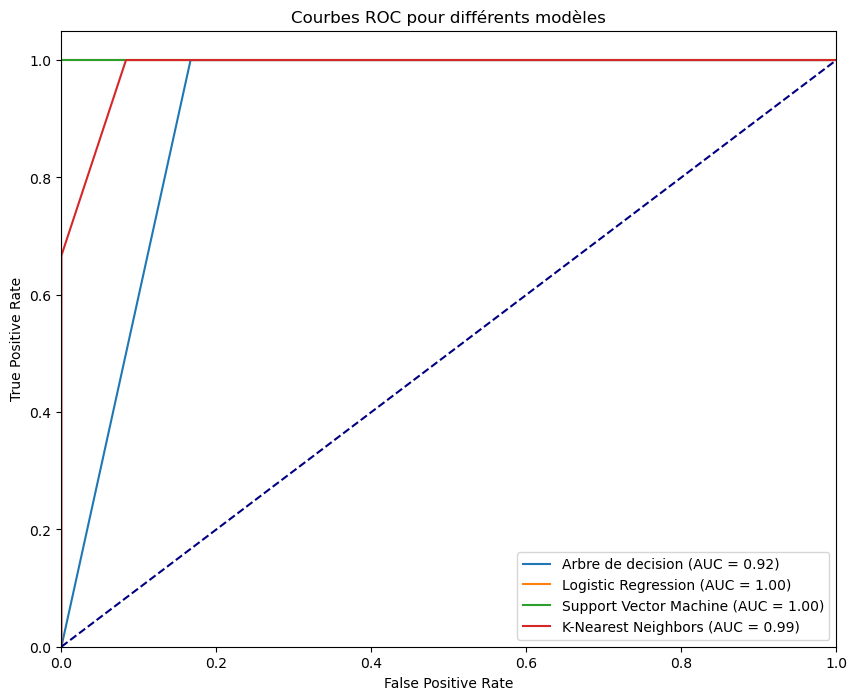

In [279]:
models = [
    ("Arbre de decision", modele_tree),
    ("Logistic Regression", modele_logistique),
    ("Support Vector Machine", modele_svm),
    ("K-Nearest Neighbors", modele_knn)
]

# Binariser les étiquettes pour la classification binaire (si nécessaire)
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Créer la figure pour afficher les courbes ROC
plt.figure(figsize=(10, 8))

# Boucle pour calculer et tracer les courbes ROC pour chaque modèle
for name, model in models:
    # Prédictions de probabilité
    y_prob = model.predict_proba(X_test)[:, 1]  # Utilise la probabilité de la classe positive
    
    # Calcul des courbes ROC
    fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
    
    # Calcul de l'aire sous la courbe (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Tracer la courbe ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Tracer la diagonale (AUC = 0.5, modèle aléatoire)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Ajouter des labels et la légende
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbes ROC pour différents modèles')
plt.legend(loc='lower right')

# Afficher la courbe
plt.show()